##1. Download Packages

In [1]:
#import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
from pathlib import Path
from collections import Counter
import nltk
import re
import math
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import random

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


##2. Connect to My Google Drive

In [2]:
## Connect to My Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##3. Twitter Text Processing

In [3]:
## Test RE
kkk = "slk@@dj @@ 'sldkjf's fdl' aa_ "
comp = re.compile('( \'\w)|(\w\' )|_|[^\w\' ]+|http')
comp.sub(' ', kkk)

"slk dj   ldkjf's fd aa  "

In [0]:
## Tweets Processing

## Keep English, digital and space
def get_en_text(text):
    comp = re.compile('( \'\w)|(\w\' )|_|[^\w\' ]+|http')
    text = comp.sub(' ', text).lower()
    return text  #Sue

## Word tokenization and lemmatization
def get_lemma_tokens(text):
    lem = WordNetLemmatizer()
    tokens = get_en_text(text).split()
    for idx,word in enumerate(tokens):
        tokens[idx] = lem.lemmatize(word, 'v')
        if tokens[idx] != word:
            continue
        tokens[idx] = lem.lemmatize(word, 'n')
        if tokens[idx] != word:
            continue
        tokens[idx] = lem.lemmatize(word, 'a')
        if tokens[idx] != word:
            continue
        tokens[idx] = lem.lemmatize(word, 'r')
        if tokens[idx] != word:
            continue
    return tokens


## Get clean text, remove stopwords
def get_clean_text(text):
    tokens = get_lemma_tokens(text)
    stopWords = set(stopwords.words('english'))
    clean_text = ''
    for token in tokens:
        if token not in stopWords:
            clean_text += ' '+ token
    return clean_text


data_folder = Path("drive/My Drive/SML/Data/Original")
train_file = data_folder / "train_tweets.txt"
labels = []
tweets = []

with open(train_file) as train_tweets:
    lines = train_tweets.read().splitlines()
    for i,l in enumerate(lines, start = 1):
        line_data = l.split('\t')
        tweet = get_clean_text(line_data[1])
        user = line_data[0]
        labels.append(user)
        tweets.append(tweet)
          
test_file = data_folder / "test_tweets_unlabeled.txt"
test_text = []

with open(test_file) as test_tweets:
    lines = test_tweets.read().splitlines()
    for l in lines:
        test_text.append(get_clean_text(l))
        
test_data = pd.DataFrame(test_text,columns =['tweet'])
test_data.to_csv('drive/My Drive/SML/Data/Processed/test_clean_data.csv', encoding='utf-8')
        

data = list(zip(labels,tweets)) # 328932 Tweets


In [6]:
data[:20]

[('8746', " handle let's try catch live next week"),
 ('8746', " go watch grey's big screen thursday indulgence"),
 ('8746', ' handle pleasure patrick hope well'),
 ('8746',
  ' handle hi travel lot lot come next month recover pneumonia well r u'),
 ('8746',
  ' rt handle look drink clean go green purchase clear2go bottle w filter near handle'),
 ('8746',
  ' rt handle ft hood official confirm 2 soldier initially hold suspect release'),
 ('8746', ' rt handle mickey mouse get make bite ly 1ustfu handle'),
 ('8746', ' handle u get invite justin'),
 ('8746', ' handle think still good friend lol'),
 ('8746', " handle remember fine u what's new"),
 ('8746', " handle that's great good coach"),
 ('8746', ' handle want picture u sit lol understand'),
 ('8746', ' handle thank rts go womma summit'),
 ('8746', ' handle grrr must go crazy'),
 ('8746', ' handle hi catch trip news dale'),
 ('8746', ' rt handle look great list follow check mine bite ly jplists'),
 ('8746',
  ' rt handle retailer enga

In [7]:
len(data)

328932

In [8]:
len(test_data)

35437

In [0]:

columnsname = ['user','tweet']
alldata = pd.DataFrame(columns=columnsname, data=data)
alldata.to_csv('drive/My Drive/SML/Data/Processed/all_clean_data.csv', encoding='utf-8')

In [12]:
random.shuffle(data)

train_test_ratio = 1  #6/10
use_size = math.floor(len(data) * train_test_ratio)
train_size = int(use_size*9/10)
print(use_size)
print(train_size)

# Partial Training Data for training
traindata = pd.DataFrame(columns=columnsname, data=data[:train_size])
traindata.to_csv('drive/My Drive/SML/Data/Processed/train.csv', encoding='utf-8')

# Partial Training Data for Validation
testdata = pd.DataFrame(columns=columnsname, data=data[train_size:use_size])
testdata.to_csv('drive/My Drive/SML/Data/Processed/test.csv', encoding='utf-8')


328932
296038


In [0]:
random_labels,random_tweets = map(list,zip(*data))
all_text = random_tweets
all_labels = random_labels
train_text = all_text[:train_size]
train_label = all_labels[:train_size]
test_text = all_text[train_size:]
test_label = all_labels[train_size:]

##4. View the Distribution Status of Tweets of Different Users

In [14]:
from collections import Counter
user_frequency = Counter(all_labels)
print(user_frequency)

Counter({'4185': 284, '319': 273, '5519': 273, '4267': 265, '4562': 264, '1698': 256, '3220': 254, '1171': 248, '6898': 247, '3989': 244, '1896': 237, '1669': 231, '6428': 228, '4974': 224, '7362': 224, '6841': 223, '2203': 221, '9911': 221, '2686': 218, '1628': 216, '4925': 215, '4054': 213, '325': 211, '2586': 210, '3743': 202, '2110': 201, '6073': 201, '8363': 200, '6024': 199, '5778': 199, '4106': 198, '6354': 198, '5523': 196, '2876': 195, '7482': 195, '4612': 193, '1509': 193, '6455': 193, '3729': 193, '7487': 192, '5424': 188, '5807': 182, '5517': 181, '7036': 176, '539': 172, '8931': 170, '5140': 170, '2363': 170, '5801': 168, '4578': 168, '7665': 167, '1590': 167, '933': 166, '495': 166, '7802': 166, '3082': 166, '5588': 165, '7305': 165, '5614': 165, '7537': 163, '9193': 162, '1966': 162, '7100': 162, '9243': 162, '4621': 161, '1113': 161, '6911': 161, '8704': 161, '3472': 161, '1650': 161, '7936': 161, '9935': 161, '438': 160, '5286': 160, '4769': 160, '1416': 160, '5393': 1

In [15]:
user_tweets_num = list(user_frequency.values())
print(user_tweets_num)

[16, 16, 39, 15, 20, 33, 20, 35, 84, 37, 36, 37, 39, 165, 19, 10, 18, 55, 84, 104, 54, 38, 34, 37, 40, 108, 34, 32, 265, 16, 80, 95, 36, 33, 19, 19, 70, 93, 35, 88, 39, 37, 106, 86, 56, 33, 35, 36, 35, 36, 25, 17, 91, 51, 53, 33, 19, 91, 35, 47, 35, 32, 18, 21, 18, 91, 18, 19, 72, 18, 55, 35, 49, 36, 143, 50, 55, 36, 83, 36, 84, 36, 36, 50, 19, 17, 53, 85, 86, 82, 36, 55, 18, 149, 35, 85, 198, 124, 41, 17, 36, 38, 33, 100, 106, 37, 60, 36, 35, 35, 35, 53, 37, 56, 20, 37, 34, 210, 163, 16, 91, 20, 107, 19, 37, 19, 35, 37, 50, 55, 90, 36, 19, 85, 161, 35, 34, 121, 39, 21, 50, 18, 103, 18, 54, 37, 17, 18, 36, 17, 37, 35, 17, 18, 54, 19, 105, 55, 50, 20, 224, 37, 138, 89, 57, 19, 53, 36, 35, 38, 117, 57, 34, 19, 17, 17, 18, 54, 33, 59, 40, 19, 17, 89, 70, 18, 19, 19, 32, 80, 72, 113, 18, 19, 18, 52, 135, 40, 18, 33, 37, 36, 119, 19, 148, 108, 33, 23, 36, 26, 19, 36, 52, 19, 34, 91, 7, 20, 90, 18, 35, 31, 88, 91, 55, 36, 54, 36, 16, 17, 37, 37, 65, 96, 18, 33, 54, 57, 37, 20, 109, 57, 39, 2

In [0]:
import numpy as np
import matplotlib.pyplot as plt

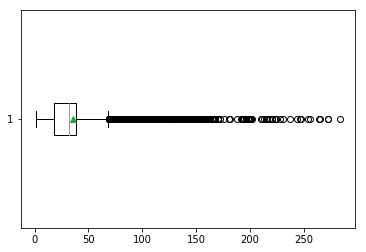

In [17]:
freq = sorted(user_tweets_num)

plt.boxplot(x=freq,whis=1.5,vert=False,showmeans=True)
plt.show()

In [18]:
q1 = np.percentile(freq,25)
q1

18.0

In [19]:
q3 = np.percentile(freq,75)
q3

38.0

In [20]:
q1 - 1.5*(q3-q1)

-12.0

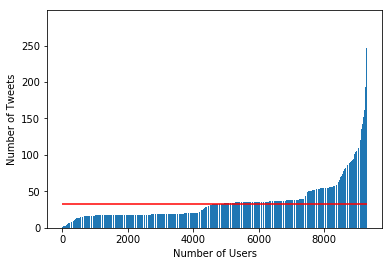

In [21]:
median = np.median(freq)
plt.bar(range(len(freq)), freq)
plt.hlines(median, 0, len(freq),color="red")
plt.xlabel("Number of Users")
plt.ylabel("Number of Tweets")
plt.show()

In [22]:
print(pd.DataFrame(user_tweets_num).describe())

                 0
count  9297.000000
mean     35.380445
std      28.146449
min       1.000000
25%      18.000000
50%      32.000000
75%      38.000000
max     284.000000


##5. View training set data distribution

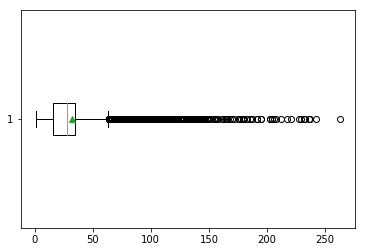

In [23]:
tuser_frequency = Counter(train_label)
tuser_tweets_num = list(tuser_frequency.values())
tfreq = sorted(tuser_tweets_num)

plt.boxplot(x=tfreq,whis=1.5,vert=False,showmeans=True)
plt.show()

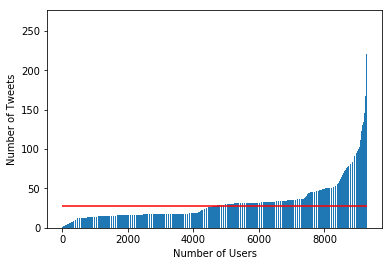

In [24]:
tmedian = np.median(tfreq)
plt.bar(range(len(tfreq)), tfreq)
plt.hlines(tmedian, 0, len(tfreq),color="red")
plt.xlabel("Number of Users")
plt.ylabel("Number of Tweets")
plt.show()

In [25]:
print(pd.DataFrame(tuser_tweets_num).describe())

                 0
count  9291.000000
mean     31.862878
std      25.391372
min       1.000000
25%      16.000000
50%      28.000000
75%      35.000000
max     263.000000
